## SVM:支持向量机
- 与传统算法进行对比，看看SVM究竟能带来什么样的效果
- 软间隔的作用，这么复杂的算法肯定会导致过拟合的现象，如何进行解决
- 核函数的作用，如果只是做线性分类，好像轮不到SVM登场，核函数才是它的强大之处

In [21]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
import warnings


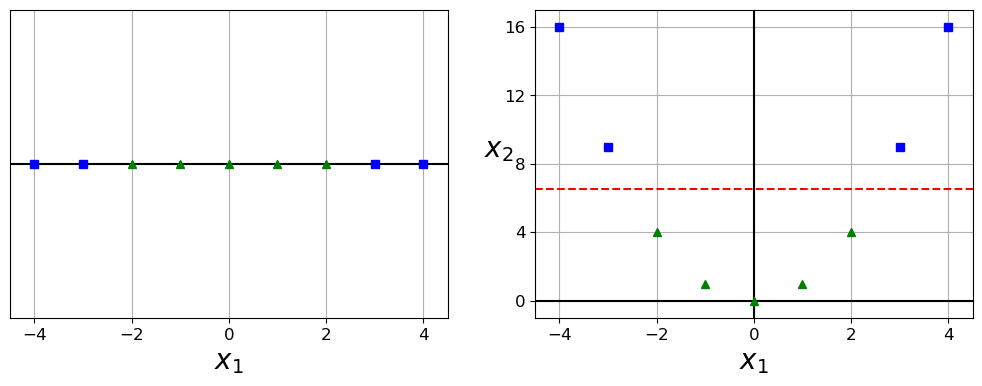

In [22]:
X1D = np.linspace(-4,4,9).reshape(-1,1)
X2D = np.c_[X1D,X1D ** 2]
y = np.array([0,0,1,1,1,1,1,0,0])
 
plt.figure(figsize = (11,4))
 
plt.subplot(121)
plt.grid(True,which = 'both')
plt.axhline(y = 0,color = 'k')
plt.plot(X1D[:,0][y == 0],np.zeros(4),"bs")
plt.plot(X1D[:,0][y == 1],np.zeros(5),"g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$",fontsize = 20)
plt.axis([-4.5,4.5,-0.2,0.2])
 
plt.subplot(122)
plt.grid(True,which = 'both')
plt.axhline(y = 0,color = 'k')
plt.axvline(x = 0,color = 'k')
plt.plot(X2D[:,0][y == 0],X2D[:,1][y == 0],"bs")
plt.plot(X2D[:,0][y == 1],X2D[:,1][y == 1],"g^")
plt.gca().get_yaxis().set_ticks([0,4,8,12,16])
plt.xlabel(r"$x_1$",fontsize = 20)
plt.ylabel(r"$x_2$",fontsize = 20,rotation = 0)
plt.plot([-4.5,4.5],[6.5,6.5],"r--")
plt.axis([-4.5,4.5,-1,17])
 
plt.subplots_adjust(right = 1)
plt.show()

In [23]:
from sklearn.svm import SVC
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = iris["target"]
 
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
 
svm_clf = SVC(kernel = "linear",C = 1e10)
svm_clf.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

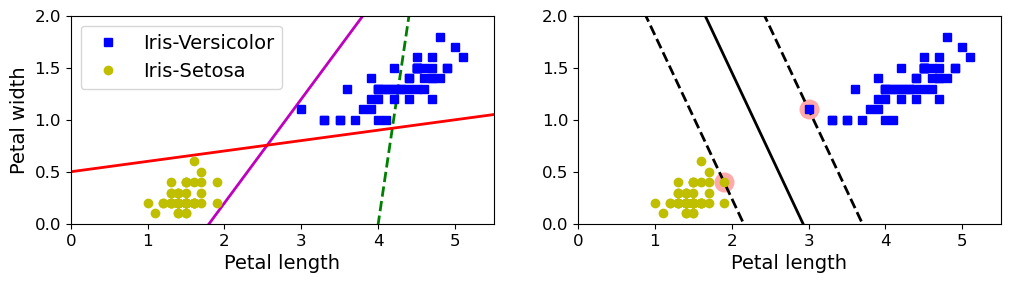

In [24]:
x0=np.linspace(0,5.5,200)
pred_1=5*x0-20
pred_2=x0-1.8
pred_3=0.1*x0+0.5
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5
 
def plot_svc_decision_boundary(svm_clf, xmin, xmax,sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
 
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
 
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
 
plt.figure(figsize=(12,2.7))
 
plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2) 
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
 
plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
 
#save_fig("large_margin_classification_plot")
plt.show()

### 数据标准化的影响

### 软间隔
- 可以使用参数C控制软间隔的程度：

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris=datasets.load_iris()
X=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(np.float64)
svm_clf=Pipeline([
('std',StandardScaler()),
    ('linear_svm',LinearSVC(C=1.0))

    
])
svm_clf.fit(X,y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svm', LinearSVC())])

In [26]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

对比不同C值所带来的效果差异

In [27]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [28]:
scaler=StandardScaler()
svm_clf1=LinearSVC(C=1,random_state=42)
svm_clf2=LinearSVC(C=100,random_state=42)
scaler_svm_clf1=Pipeline([
('std',scaler),
    ('linear_svm',svm_clf1) 
])

scaler_svm_clf2=Pipeline([
('std',scaler),
    ('linear_svm',svm_clf2) 
])
scaler_svm_clf1.fit(X,y)
scaler_svm_clf2.fit(X,y)

D:\anconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('std', StandardScaler()),
                ('linear_svm', LinearSVC(C=100, random_state=42))])

In [29]:
print(scaler.mean_)

[3.758      1.19933333]


- 在右侧。使用较高的C值，分类器会减少误分类，但最终会有较小的间隔
- 在左侧，使用较低的C值，间隔要大的多，但是很多实例最终会出现在间隔之类，用来防止过拟合

(4.0, 6.0, 0.8, 2.8)

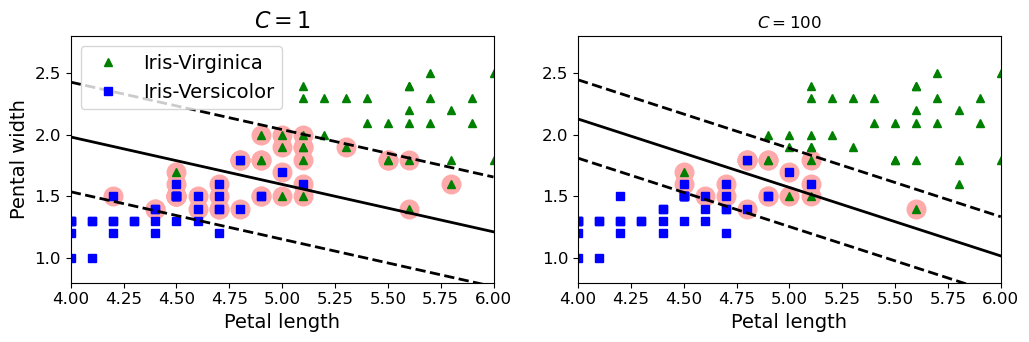

In [30]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf1.coef_ = np.array([w1])
 
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf2.intercept_ = np.array([b2])
svm_clf2.coef_ = np.array([w2])
 
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
 
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf2.support_vectors_ = X[support_vectors_idx2]
plt.figure(figsize = (12,3.2))
 
plt.subplot(121)F
plt.plot(X[:,0][y == 1],X[:,1][y == 1], "g^",label = "Iris-Virginica")
plt.plot(X[:,0][y == 0],X[:,1][y == 0], "bs",label = "Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1,4,6)
plt.xlabel("Petal length",fontsize = 14)
plt.ylabel("Pental width",fontsize = 14)
plt.legend(loc = "upper left",fontsize = 14)
plt.title ("$C = {}$".format(svm_clf1.C),fontsize=16)
plt.axis([4,6,0.8,2.8])
 
plt.subplot(122)
plt.plot(X[:,0][y == 1],X[:,1][y == 1], "g^")
plt.plot(X[:,0][y == 0],X[:,1][y == 0], "bs")
plot_svc_decision_boundary(svm_clf2,4,6)
plt.xlabel("Petal length",fontsize = 14)
plt.title ("$C = {}$".format(svm_clf2.C))
plt.axis([4,6,0.8,2.8])

### 非线性支持向量机

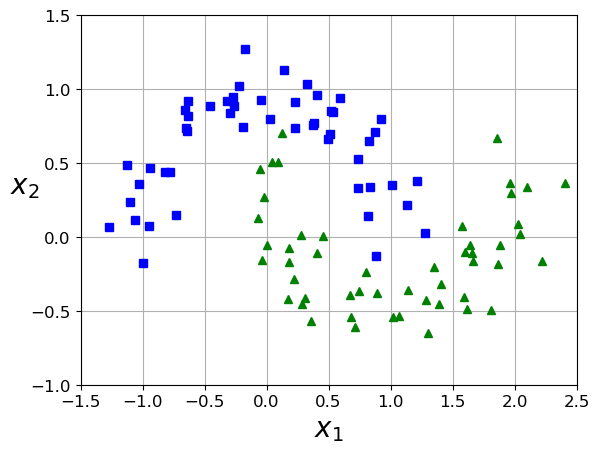

In [31]:
from sklearn.datasets import  make_moons
X,y = make_moons(n_samples = 100,noise = 0.15,random_state = 42)
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y == 0],X[:,1][y == 0],"bs")
    plt.plot(X[:,0][y == 1],X[:,1][y == 1],"g^")
    plt.axis(axes)
    plt.grid(True,which = 'both')
    plt.xlabel(r"$x_1$",fontsize = 20)
    plt.ylabel(r"$x_2$",fontsize = 20,rotation = 0)
 
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [32]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomia_svm_clf=Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('std',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss="hinge")) 
])
polynomia_svm_clf.fit(X,y)

D:\anconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('std', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

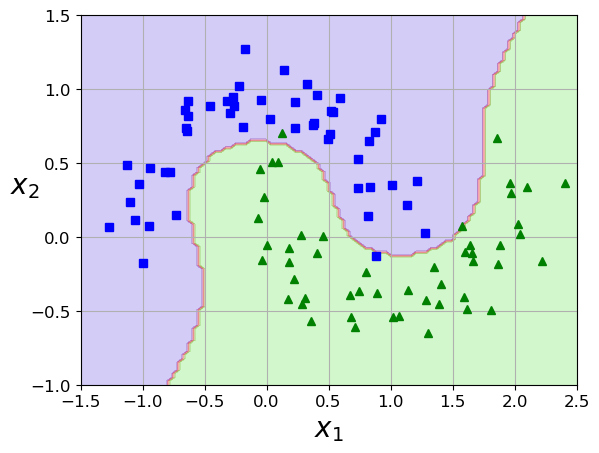

In [33]:
def plot_preditions(clf,axes):
    x0s=np.linspace(axes[0],axes[1],100)
    x1s=np.linspace(axes[2],axes[3],100)
    x0,x1=np.meshgrid(x0s,x1s)
    X=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
plot_preditions(polynomia_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])


### SVM核函数技巧

In [34]:
from sklearn.svm import SVC
poly_kernel_svm_clf=Pipeline([
    
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5)) 

])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [35]:
poly100_kernel_svm_clf=Pipeline([
    
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=10,coef0=100,C=5)) 

])
poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Text(0.5, 1.0, '$d=10,r=100,C=5$')

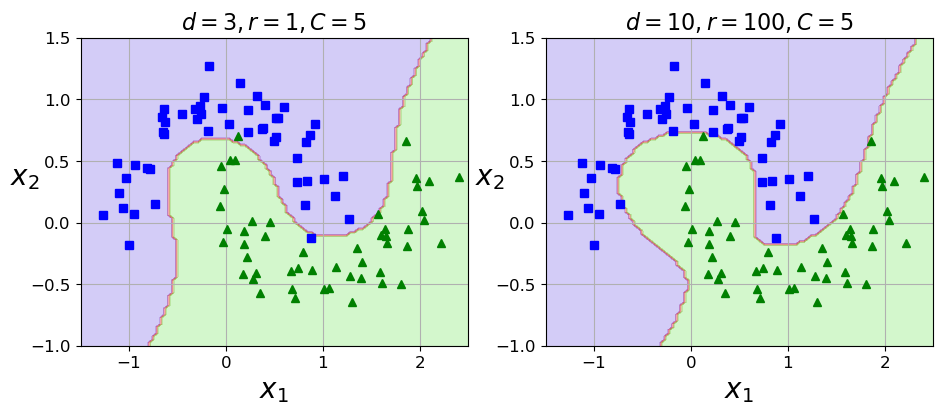

In [36]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_preditions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title("$d=3,r=1,C=5$",fontsize=16)

plt.subplot(122)
plot_preditions(poly100_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title("$d=10,r=100,C=5$",fontsize=16)

### 高斯核函数

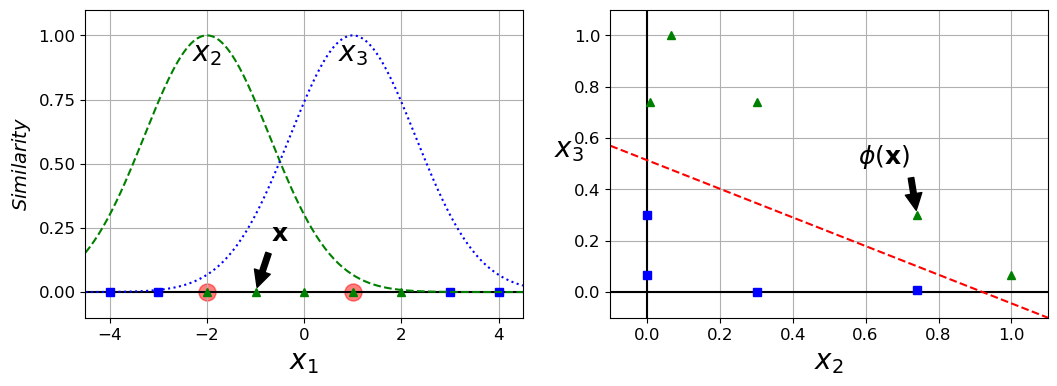

In [37]:
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark,axis = 1) ** 2)
 
gamma = 0.3
 
x1s = np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s = gaussian_rbf(x1s,-2,gamma)
x3s = gaussian_rbf(x1s,1,gamma)
 
XK = np.c_[gaussian_rbf(X1D,-2,gamma),gaussian_rbf(X1D,1,gamma)]
yk = np.array([0,0,1,1,1,1,1,0,0])
 
plt.figure(figsize = (11,4))
 
plt.subplot(121)
plt.grid(True,which = 'both')
plt.axhline(y = 0,color = 'k')
plt.scatter(x = [-2,1],y = [0,0],s = 150,alpha = 0.5,c = "red")
plt.plot(X1D[:,0][yk == 0],np.zeros(4),"bs")
plt.plot(X1D[:,0][yk == 1],np.zeros(5),"g^")
plt.plot(x1s,x2s,"g--")
plt.plot(x1s,x3s,"b:")
plt.gca().get_yaxis().set_ticks([0,0.25,0.5,0.75,1])
plt.xlabel(r"$x_1$",fontsize = 20)
plt.ylabel(r"$Similarity$",fontsize = 14)
plt.annotate(r'$\mathbf{x}$',
             xy = (X1D[3,0],0),
             xytext = (-0.5,0.20),
             ha = "center",
             arrowprops = dict(facecolor = 'black',shrink = 0.1),
             fontsize = 18,)
plt.text(-2,0.9,"$x_2$",ha = "center",fontsize = 20)
plt.text(1,0.9,"$x_3$",ha = "center",fontsize = 20)
plt.axis([-4.5,4.5,-0.1,1.1])
 
plt.subplot(122)
plt.grid(True,which = 'both')
plt.axhline(y = 0,color = 'k')
plt.axvline(x = 0,color = 'k')
plt.plot(XK[:,0][yk == 0],XK[:,1][yk == 0],"bs")
plt.plot(XK[:,0][yk == 1],XK[:,1][yk == 1],"g^")
plt.xlabel(r"$x_2$",fontsize = 20)
plt.ylabel(r"$x_3$",fontsize = 20,rotation = 0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy = (XK[3,0],XK[3,1]),
             xytext = (0.65,0.50),
             ha = "center",
             arrowprops = dict(facecolor = 'black',shrink = 0.1),
             fontsize = 18,)
plt.plot([-0.1,1.1],[0.57,-0.1],"r--")
plt.axis([-0.1,1.1,-0.1,1.1])
 
plt.subplots_adjust(right = 1)
#save_fig("kernel_method_plot")
plt.show()

理论情况下hi得到怎么维特征呢？可以对每一个实例（样本数据点）创建一个地标，此时会将mn的训练集转换成mm的训练集

### SVM中利用了核函数的计算技巧，大大降低了计算复杂度

- 增加gamma y使得高斯曲线变窄，因此每个实例的影响范围都小；决策边界变得更不规则，在个别实例周围摆动
- 减少gamma y是的高斯曲线变宽，因此实例具有更大的影响范围，并且决策边界更加平滑。

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

rbf_kernel_svm_clf=Pipeline(
    [
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001))
    ]
)
rbf_kernel_svm_clf.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

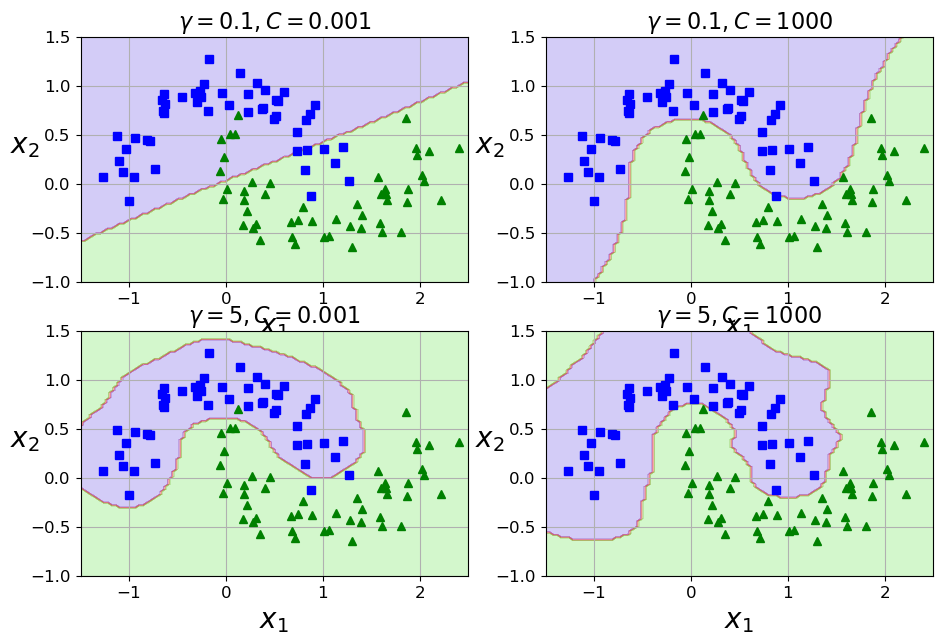

In [61]:
from sklearn.svm import SVC
gamm1,gamm2=0.1,5
svm_clfs=[]
c1,c2=0.001,1000
hyperparams = (gamm1,c1),(gamm1,c2),(gamm2,c1),(gamm2,c2)
for gamma,C in hyperparams:
    rbf_kernel_svm_clf=Pipeline([

          ('scaler',StandardScaler()),
          ('svm_clf',SVC(kernel='rbf',gamma=gamma,C=C))
         
     ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11,7))
for i,svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plot_preditions(svm_clf,[-1.5,2.5,-1,1.5])
    plot_dataset(X,y,[-1.5,2.5,-1,1.5])
    gamma,C=hyperparams[i]
    plt.title(r"$\gamma = {},C = {}$".format(gamma,C),fontsize = 16)
plt.show()